In [1]:
import pathlib
from itertools import chain, product

import pandas as pd
import matplotlib.pyplot as plt
from Bio import Phylo
from elyawy.constants import length_distributions, indel_models

plt.style.use('seaborn-v0_8-colorblind')

all_models = tuple("_".join(i) for i in (product(length_distributions, indel_models)))

In [3]:
dataset = 'other_tests/benchmark'
corrected = True
# REMOTE_PATH = pathlib.Path("/run/user/1000/gvfs/sftp:host=power.tau.ac.il,user=elyawygoda/groups/pupko/elyawygoda/length_distributions/all_outputs/results_rerun/").resolve() # sys.argv[2]
REMOTE_PATH = pathlib.Path("/run/user/1000/kio-fuse-fDCaFk/sftp/elyawygoda@powerlogin.tau.ac.il:22/groups/pupko/elyawygoda/length_distributions/all_outputs/results_rerun/").resolve() # sys.argv[2]

REMOTE_PATH = REMOTE_PATH / dataset
all_outputs_path = pathlib.Path(REMOTE_PATH).resolve()
# all_outputs_path = chain(all_outputs_path.glob("*Primates*"),all_outputs_path.glob("*Rodent*"))

all_outputs_path = list(all_outputs_path.iterdir())


In [4]:
len(all_outputs_path)

8

In [5]:
benchmark_df = pd.read_csv(all_outputs_path[0] / "benchmark_100.csv", index_col=0)
benchmark_df = benchmark_df.T

In [6]:
new_header = benchmark_df.iloc[0] #grab the first row for the header
benchmark_df = benchmark_df[1:] #take the data less the header row
benchmark_df.columns = new_header #set the header row as the df header

In [8]:
benchmark_df.index = (benchmark_df.index.astype(int)*len(all_models)).astype(str)
# benchmark_df.index = [for x in ]

In [11]:
lendist_mapper = {
    "zipf":"Zipf",
    "poisson":"Poisson",
    "geometric":"geometric"
}

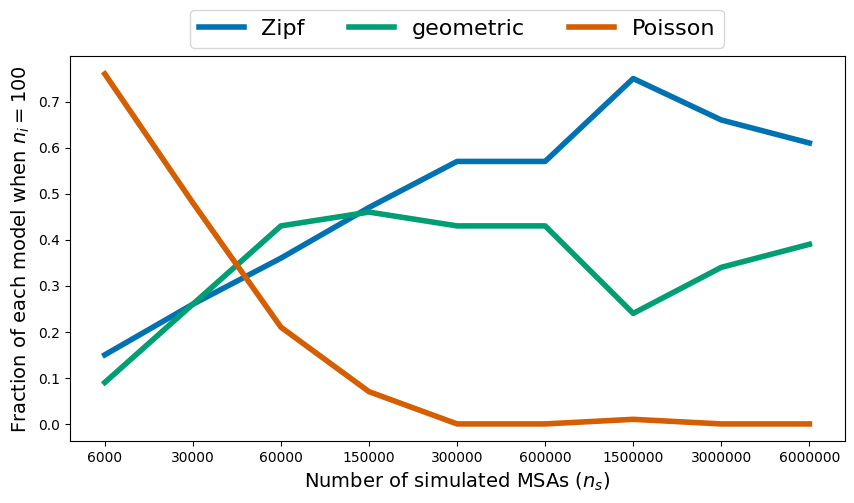

In [12]:
label_size = 14

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot
ax.plot(benchmark_df, linewidth=4, label=benchmark_df.columns.map(lendist_mapper), )
plt.xlabel("Number of simulated MSAs ($n_s$)", fontsize=label_size)
plt.ylabel("Fraction of each model when $n_i=100$", fontsize=label_size)
# print(['{:,}'.format(int(x[2])) for x in ax.get_xmajorticklabels()])

# ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks()])
plt.legend(bbox_to_anchor=(0.5, 1.15), loc="upper center" , ncol=len(benchmark_df.columns), fontsize=16)

plt.savefig("equilibrium.svg",bbox_inches="tight", dpi=200)
plt.show()

In [95]:
ax.get_xmajorticklabels()[0].set_text(format(int(ax.get_xmajorticklabels()[0].get_text()),","))

In [97]:
ax.get_xmajorticklabels()[0].get_text()

'6000'